In [4]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Keras has the MNIST digits as a built in dataset. Note that this requires an internet connection as the data is downloaded and not directly in the Keras package.

In [5]:
from keras.datasets import mnist

In [10]:
digits = mnist.load_data()
(train_images, train_labels), (test_images, test_lables) = mnist.load_data()

Images, in greycale, are really just bytes running 0-255. Which is convenient. since Keras needs every bit of data to be numerical

In [13]:
np.set_printoptions(linewidth=90, formatter={'all': lambda x : '{0}'.format(x)})
for row in train_images[0]:
    print(row)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 3 18 18 18 126 136 175 26 166 255 247 127 0 0 0 0]
[0 0 0 0 0 0 0 0 30 36 94 154 170 253 253 253 253 253 225 172 253 242 195 64 0 0 0 0]
[0 0 0 0 0 0 0 49 238 253 253 253 253 253 253 253 253 251 93 82 82 56 39 0 0 0 0 0]
[0 0 0 0 0 0 0 18 219 253 253 253 253 253 198 182 247 241 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 80 156 107 253 253 205 11 0 43 154 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 14 1 154 253 90 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 139 253 190 2 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 11 190 253 70 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 35 241 225 160 108 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 81 240 253 253 119 25 0 0 

### Now, let's actually see this as an image

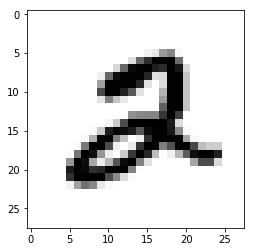

In [18]:
plt.imshow(train_images[5], cmap='binary')

pretty standard, it's an array, with an array of arrays, each holding the pixel. Believe it or not, you now know tensors. 
Let's look at the shape of the data.  
It's a 3D array -- image, X, Y with values in the array just being 0-255 8bit integers.

In [19]:
train_images.shape, train_images.dtype

((60000, 28, 28), dtype('uint8'))

Keras algorithms have a data trick - they work on floating point math, and they work best when that data ranges from 0.0 to 1.0. So you always need to normalize your data.

In [24]:
np.set_printoptions(precision=5)
(train_images[0] / train_images.max())[5:15]

array([[0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.01176, 0.07059, 0.07059, 0.07059, 0.49412, 0.53333,
        0.68627, 0.10196, 0.65098, 1.     , 0.96863, 0.49804, 0.     , 0.     , 0.     ,
        0.     ],
       [0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.11765,
        0.14118, 0.36863, 0.60392, 0.66667, 0.99216, 0.99216, 0.99216, 0.99216, 0.99216,
        0.88235, 0.67451, 0.99216, 0.94902, 0.76471, 0.25098, 0.     , 0.     , 0.     ,
        0.     ],
       [0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.19216, 0.93333,
        0.99216, 0.99216, 0.99216, 0.99216, 0.99216, 0.99216, 0.99216, 0.99216, 0.98431,
        0.36471, 0.32157, 0.32157, 0.21961, 0.15294, 0.     , 0.     , 0.     , 0.     ,
        0.     ],
       [0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.07059, 0.85882,
        0.99216, 0.99216, 0.99216, 0.99216, 0.99216, 0.7

So -- that's input -- images are just multidimensional arrays,   
and you need to remember to normalize them into floating point ranging 0.0 to 1.0. Now for outputs,  
the images are 0-9 digits and each of these digits is a 'class', not in the OO sense, but in the classification sense.

In [25]:
train_labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

Our rules above about ranging numbers from 0.0 to 1.0 also apply to the outputs of Keras.   
So, we have to transform labels, but -- we want them discreet,   
we want to predict 0 1 2 3 4 5 6 7 8 9 -- predicting 1.5 isn't a digit. So -- we will do a categorical 'one-hot' encoding,   
which you can think of as a kind of bitmap.

In [26]:
keras.utils.to_categorical(train_labels, 10)[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

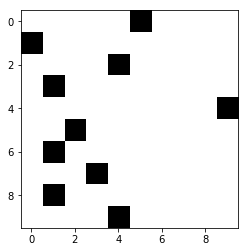

In [27]:
plt.imshow(keras.utils.to_categorical(train_labels, 10)[:10], cmap='binary')

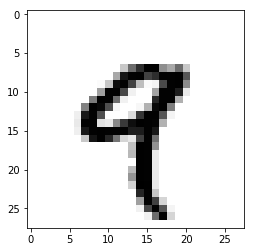

In [28]:
plt.imshow(train_images[4], cmap='binary')

And that's it -- Keras machine learning is going to learn a function that takes a bitmap, and returns another bitmap, which just so happens to be encoded into floating point multidemsional arrays, known as tensors.

This really is the cookbook:

Tensors are just multidimensional arrays
Set them up as (image, x, y), with the pixels being 0.0 to 1.0
Labels or Classes are just array
Set them up as (image, number of classes)
Use one-hot encoding -- set the target label to 1.0, others to 0.0